In [1]:
print("Hello world, this is B and E-tree 💛")


Hello world, this is B and E-tree 💛


In [1]:
import json

# Load watch-history.json
with open('../watch-history.json', encoding='utf-8') as f:
    watch_history = json.load(f)

# Load search-history.json
with open('../search-history.json', encoding='utf-8') as f:
    search_history = json.load(f)

print(f"Loaded {len(watch_history)} watch entries and {len(search_history)} search entries!")


Loaded 28965 watch entries and 1423 search entries!


In [2]:
import pandas as pd

# Create a DataFrame from your watch history
watch_df = pd.DataFrame(watch_history)

# Show the first few entries to see what the structure looks like
watch_df.head(3)


,header,title,titleUrl,subtitles,time,products,activityControls
0,YouTube,Watched Documenting the biggest failure in vid...,https://www.youtube.com/watch?v=fAoONciUM7M,"[{'name': 'Mujin', 'url': 'https://www.youtube...",2025-07-28T17:28:55.849Z,[YouTube],[YouTube watch history]
1,YouTube,Watched How to Destroy Your Extremely Successf...,https://www.youtube.com/watch?v=TAbFPZxmaGw,"[{'name': 'Mujin', 'url': 'https://www.youtube...",2025-07-28T16:48:21.714Z,[YouTube],[YouTube watch history]
2,YouTube,Watched How this DERANGED Vtuber became known ...,https://www.youtube.com/watch?v=qOt8x9eBM8Q,"[{'name': 'Mujin', 'url': 'https://www.youtube...",2025-07-28T16:15:36.087Z,[YouTube],[YouTube watch history]


In [3]:
# Filter entries where the product is YouTube Music
music_df = watch_df[watch_df['products'].astype(str).str.contains("YouTube Music")].copy()

# Show a preview of the filtered music data
music_df.head(5)


,header,title,titleUrl,subtitles,time,products,activityControls


In [4]:
# Lowercase titles and URLs for safer keyword matching
watch_df['title_lower'] = watch_df['title'].str.lower()
watch_df['url_lower'] = watch_df['titleUrl'].str.lower()

# Keywords that often signal music
music_keywords = ['official audio', 'lyrics', 'topic', 'official video', 'remix', 'cover']

# Match rows where title or URL contains any keyword
music_df = watch_df[watch_df['title_lower'].fillna('').str.contains('|'.join(music_keywords)) |
                    watch_df['url_lower'].fillna('').str.contains('|'.join(music_keywords))].copy()

# Preview
music_df.head(5)


,header,title,titleUrl,subtitles,time,products,activityControls,title_lower,url_lower
6,YouTube Music,Watched Sean Paul - She Doesn't Mind (Jesse Bl...,https://music.youtube.com/watch?v=ghK8FuP4mB4,"[{'name': 'Jesse Bloch', 'url': 'https://www.y...",2025-07-28T15:45:31.544Z,[YouTube],[YouTube watch history],watched sean paul - she doesn't mind (jesse bl...,https://music.youtube.com/watch?v=ghk8fup4mb4
17,YouTube Music,"Watched Lady Gaga, Bruno Mars - Die With A Smi...",https://music.youtube.com/watch?v=bhzgi0g-EOc,"[{'name': 'Theomatica', 'url': 'https://www.yo...",2025-07-28T12:46:58.004Z,[YouTube],[YouTube watch history],"watched lady gaga, bruno mars - die with a smi...",https://music.youtube.com/watch?v=bhzgi0g-eoc
22,YouTube Music,Watched Teardrops (Rules Remix),https://music.youtube.com/watch?v=z4TZuig4DeY,"[{'name': 'Womack & Womack - Topic', 'url': 'h...",2025-07-28T12:32:28.843Z,[YouTube],[YouTube watch history],watched teardrops (rules remix),https://music.youtube.com/watch?v=z4tzuig4dey
25,YouTube Music,Watched Say My Name (Remix),https://music.youtube.com/watch?v=gcA2ivj8Bgg,"[{'name': 'Morgan Seatree - Topic', 'url': 'ht...",2025-07-28T12:24:10.137Z,[YouTube],[YouTube watch history],watched say my name (remix),https://music.youtube.com/watch?v=gca2ivj8bgg
27,YouTube Music,Watched Ameno (Hard Techno Remix),https://music.youtube.com/watch?v=C2XAD0pMnsI,"[{'name': 'Jayron - Topic', 'url': 'https://ww...",2025-07-28T12:14:26.028Z,[YouTube],[YouTube watch history],watched ameno (hard techno remix),https://music.youtube.com/watch?v=c2xad0pmnsi


In [5]:
top_songs = music_df['title'].value_counts().head(10)
top_songs


title
Watched Woops (Dimitri Vegas & Junkie Kid Remix)           16
Watched Born This Way (Jost & Naaf Remix)                  14
Watched Big Ed Claps Back And I May Never Recover          10
Watched Lady Gaga ♥ Fooled Me Again, Honest Eyes LYRICS    10
Watched Beethoven - Fur Elise (Komuz Remix)                 9
Watched Heads Will Roll (A-Trak Remix Radio Edit)           8
Watched Gravity Falls Theme Song (OVA Dubstep Remix)        7
Watched Say My Name (Remix)                                 7
Watched Big Ed Is Covered In Mayo And On The Prowl          6
Watched Berq - Rote Flaggen (Official Video)                6
Name: count, dtype: int64

In [6]:
import ast

# Safely convert string to dictionary (if it's stored as a string)
def extract_artist(sub):
    try:
        if isinstance(sub, list):
            return sub[0]['name']
        elif isinstance(sub, str):
            sub_list = ast.literal_eval(sub)
            return sub_list[0]['name'] if sub_list else None
    except:
        return None

music_df['artist'] = music_df['subtitles'].apply(extract_artist)
top_artists = music_df['artist'].value_counts().head(10)
top_artists


artist
LadyGagaVEVO               28
Lady Gaga - Topic          22
CinnamonToastKen           17
Bountyhunter - Topic       16
XoAmalia                   14
SARA’H                     14
Jill                       10
Komuz - Topic               9
Jasmine Thompson            8
Yeah Yeah Yeahs - Topic     8
Name: count, dtype: int64

In [7]:
# Convert time to datetime
music_df['time'] = pd.to_datetime(music_df['time'])

# Group by month
monthly_counts = music_df['time'].dt.to_period('M').value_counts().sort_index()

# Plot
monthly_counts.plot(kind='bar', title='Your Monthly Listening Activity 🎵')


ValueError: time data "2025-07-12T07:25:39Z" doesn't match format "%Y-%m-%dT%H:%M:%S.%f%z", at position 117. You might want to try:
    - passing `format` if your strings have a consistent format;
    - passing `format='ISO8601'` if your strings are all ISO8601 but not necessarily in exactly the same format;
    - passing `format='mixed'`, and the format will be inferred for each element individually. You might want to use `dayfirst` alongside this.

In [8]:
# Convert with error handling
music_df['time'] = pd.to_datetime(music_df['time'], errors='coerce')


In [9]:
# Remove invalid timestamps
music_df = music_df.dropna(subset=['time'])

# Group by month
monthly_counts = music_df['time'].dt.to_period('M').value_counts().sort_index()

# Plot
monthly_counts.plot(kind='bar', title='Your Monthly Listening Activity 🎵')


C:\Users\emmap\AppData\Local\Temp\ipykernel_19584\2106134962.py:5: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  monthly_counts = music_df['time'].dt.to_period('M').value_counts().sort_index()


ImportError: matplotlib is required for plotting when the default backend "matplotlib" is selected.

C:\Users\emmap\AppData\Local\Temp\ipykernel_19584\2367506916.py:7: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  monthly_counts = music_df['time'].dt.to_period('M').value_counts().sort_index()
C:\Users\emmap\AppData\Local\Temp\ipykernel_19584\2367506916.py:13: UserWarning: Glyph 127926 (\N{MULTIPLE MUSICAL NOTES}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\emmap\AppData\Local\Programs\Python\Python313\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 127926 (\N{MULTIPLE MUSICAL NOTES}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


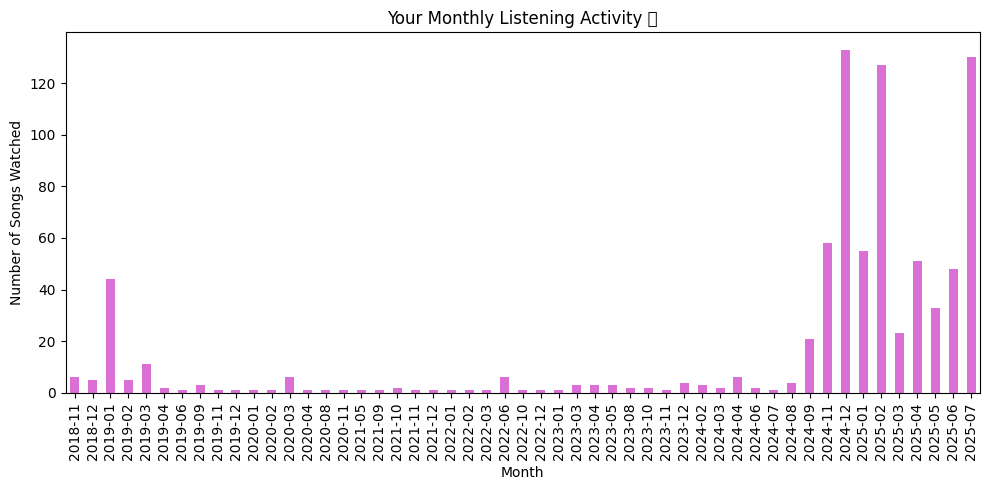

In [10]:
import matplotlib.pyplot as plt

# Make sure your time column is datetime
music_df['time'] = pd.to_datetime(music_df['time'], errors='coerce')

# Group by month
monthly_counts = music_df['time'].dt.to_period('M').value_counts().sort_index()

# Plot
monthly_counts.plot(kind='bar', figsize=(10, 5), color='orchid', title='Your Monthly Listening Activity 🎶')
plt.xlabel("Month")
plt.ylabel("Number of Songs Watched")
plt.tight_layout()
plt.show()
